<a href="https://colab.research.google.com/github/SathsaraniBS/CS102.3_Programming-in-C_30027/blob/main/Linear_Regression_Basic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  # Access the single weight value from the array
  y0 = trained_bias[0]
  x1 = feature[-1]
  # Access the single weight value and ensure correct calculation with x1
  y1 = trained_bias[0] + (trained_weight[0][0] * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   =  np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step - loss: 322.1927 - root_mean_squared_error: 17.9497
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 277.0961 - root_mean_squared_error: 16.6462
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 247.5993 - root_mean_squared_error: 15.7353
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 224.7214 - root_mean_squared_error: 14.9907
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 205.7041 - root_mean_squared_error: 14.3424
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 189.2883 - root_mean_squared_error: 13.7582
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 174.7798 - root_mean_squared_error: 13.2204
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 161.7498 - root_mean_squared_error: 12.7181
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 149.9129 - root_mean_squared_error: 12.2439
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 139.0681 - root_mean_squared_error

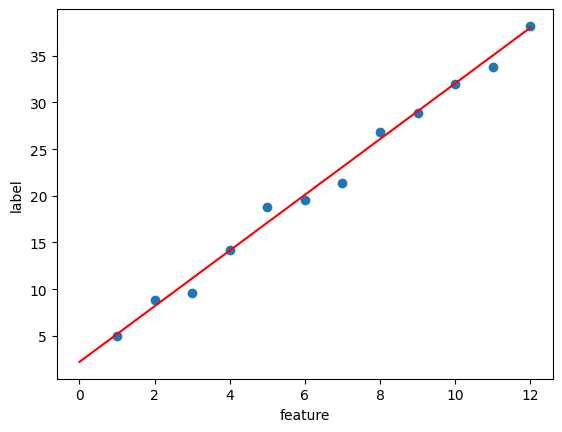

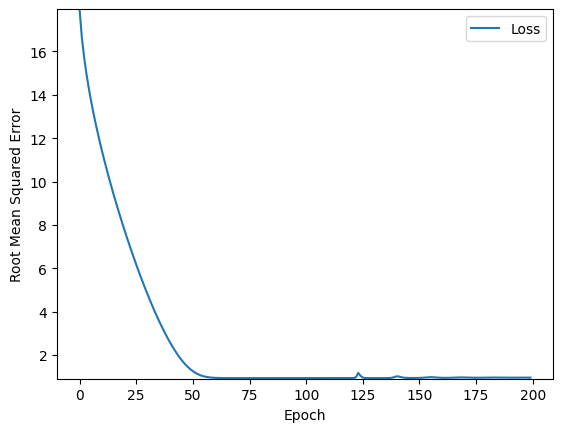

In [ ]:
learning_rate=0.05
epochs=200
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)